In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Read data for X and y
df7 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/7.csv")
df15 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/15.csv")
df16 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/16.csv")
df21 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/21.csv")
df33 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/33.csv")
df56 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/56.csv")
df68 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/68.csv")
df95 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/95.csv")
df1000 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/1000.csv")
df1001 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/1001.csv")

df = pd.concat([df7,df15, df16, df21, df33, df56, df68, df95, df1000, df1001], ignore_index=True)

X = df.drop(columns=['y']).values
y = df['y'].values

In [43]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

#oversampler = RandomOverSampler(random_state=42)
#X_res, y_res = oversampler.fit_resample(X,y)

In [10]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# Define the scoring metric
scorer = make_scorer(f1_score)

model = KNeighborsClassifier()

grid_space={'n_neighbors':[5,7,9,11,13,15],
            'metric':['euclidean','manhattan']
            }

grid = GridSearchCV(model,param_grid=grid_space,cv=2,scoring="f1_micro",verbose=10)

model_grid = grid.fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2; 1/12] START metric=euclidean, n_neighbors=5............................
[CV 1/2; 1/12] END metric=euclidean, n_neighbors=5;, score=0.461 total time=  19.7s
[CV 2/2; 1/12] START metric=euclidean, n_neighbors=5............................
[CV 2/2; 1/12] END metric=euclidean, n_neighbors=5;, score=0.463 total time=  17.1s
[CV 1/2; 2/12] START metric=euclidean, n_neighbors=7............................
[CV 1/2; 2/12] END metric=euclidean, n_neighbors=7;, score=0.465 total time=  21.0s
[CV 2/2; 2/12] START metric=euclidean, n_neighbors=7............................
[CV 2/2; 2/12] END metric=euclidean, n_neighbors=7;, score=0.460 total time=  19.0s
[CV 1/2; 3/12] START metric=euclidean, n_neighbors=9............................
[CV 1/2; 3/12] END metric=euclidean, n_neighbors=9;, score=0.473 total time=  21.7s
[CV 2/2; 3/12] START metric=euclidean, n_neighbors=9............................
[CV 2/2; 3/12] END metric=euclide

In [12]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'metric': 'manhattan', 'n_neighbors': 13}
Best score is: 0.5042892099336675


In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [57]:
y_pred = knn.predict(X_test)
print(y_pred[0])
print(y_test[0])

1000
56


In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.41      0.71      0.52      1641
          15       0.12      0.34      0.18       149
          16       0.00      0.00      0.00        45
          21       0.15      0.08      0.11        36
          33       0.26      0.26      0.26      1654
          56       0.57      0.53      0.55      2185
          68       0.31      0.18      0.23      1655
          95       0.22      0.10      0.14        96
        1000       0.59      0.59      0.59       803
        1001       0.30      0.19      0.23      1603

    accuracy                           0.40      9867
   macro avg       0.29      0.30      0.28      9867
weighted avg       0.39      0.40      0.38      9867



In [59]:
# Performance evaluation with verification data

# Read data for X and y
df7_verif = pd.read_csv("data/Test Clean/Separated by error type/7.csv")
df15_verif = pd.read_csv("data/Test Clean/Separated by error type/15.csv").iloc[1:]
df16_verif = pd.read_csv("data/Test Clean/Separated by error type/16.csv").iloc[1:]
df1000_verif = pd.read_csv("data/Test Clean/Separated by error type/1000.csv").iloc[1:]

df_verif = pd.concat([df7_verif, df15_verif, df16_verif, df1000_verif], ignore_index=True)

X_verif = df_verif.drop(columns=['y']).values
y_verif = df_verif['y'].values

In [60]:
y_pred_verif = knn.predict(X_verif)
print(y_pred_verif[0])

7


In [61]:
print(classification_report(y_verif, y_pred_verif))

              precision    recall  f1-score   support

           7       0.97      0.54      0.69     76652
          15       0.00      0.11      0.01       665
          16       0.00      0.00      0.00        22
          21       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         0
          56       0.00      0.00      0.00         0
          68       0.00      0.00      0.00         0
          95       0.00      0.00      0.00         0
        1000       0.09      0.30      0.14      2271
        1001       0.00      0.00      0.00         0

    accuracy                           0.53     79610
   macro avg       0.11      0.09      0.08     79610
weighted avg       0.94      0.53      0.67     79610



C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


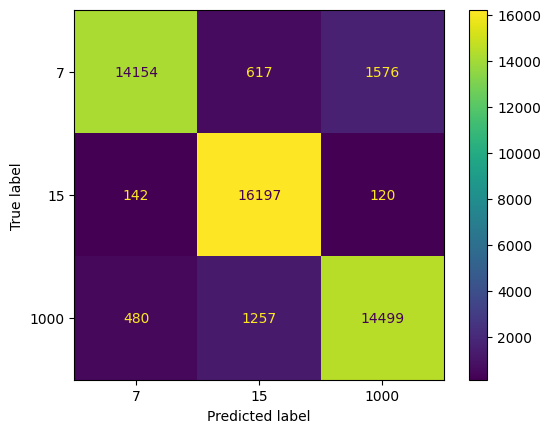

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()